# Fourier series

In this exercise, we study the Fourier series of a function, e.g., a gravity anomaly $\Delta g$ defined along a profile in $x-$direction. First, we will compute and interpret the Fourier coefficients, and then we will try to reconstruct the function itself using a limited number of Fourier coefficients.

## 0. Import Python packages and define gravitational constant

We start by importing some Python packages.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Definition of a test function

**As a first step, we define some test function for which we will later compute the Fourier coefficients.** In the interest of an intuitive interpretation, we will interpret this function in terms of some measured gravity anomaly. For simplcity, $x$ ranges between -1 m and 1 m in discrete steps of 0.002 m.

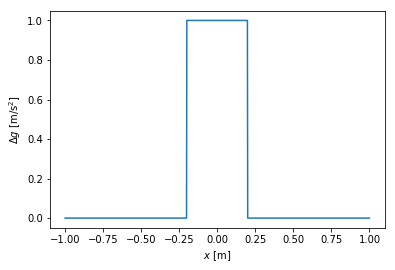

In [56]:
x=np.linspace(-1.0,1.0,1001)
dg=np.zeros(len(x))
dg[400:600]=1.0

plt.plot(x,dg)
plt.xlabel('$x$ [m]')
plt.ylabel(r'$\Delta g$ [m/s$^2$]')
plt.show()

## 2. Analysis

**The computation of the Fourier coefficients $a_n$ and $b_n$ is commonly referred to as *analysis*.** Using Eqs. (7) and (8) of Box 4.4, we compute the first 10 coefficients. The integrals are approximated by a sum over the discrete values along the $x$-axis.

In [58]:
N=10
a=np.zeros(N)
b=np.zeros(N)

for n in range(N):
    a[n]=0.002*np.sum(dg*np.cos(n*np.pi*x))
    b[n]=0.002*np.sum(dg*np.sin(n*np.pi*x))

## 3. Synthesis

**The reconstruction of a function using the Fourier coefficients is called *synthesis*.** Using Eq. (3) of Box 4.4, we synthesize $\Delta g(x)$. The reconstruction is only approximate because only a small number of Fourier coefficients has been used.

In [59]:
f=0.5*b[0]*np.ones(len(x))

for n in range(N):
    f=f+a[n]*np.cos(n*np.pi*x)+b[n]*np.sin(n*np.pi*x)

## 4. Exercises

1) Plot the Fourier coefficients $a_n$ and $b_n$ computed in step 2, and the reconstructed function computed in step 3. Explain why the reconstructed function seems to be a smoother version of the original $\Delta g$.

2) Increase the number of Fourier coefficients to $N=200$. Does the reconstruction of the function generally improve? Are there specific parts of the function where the reconstruction is still poor? 

3) With the help of Fourier analysis, we can *filter* a function. Implement a *high-pass filter* that only retains the higher wavenumbers of the function by removing $a_0$ from the Fourier synthesis. What happens to the reconstruction when even more coefficients with small indices $n$ are removed? 

4) **Optional:** Modify the above calculations such that the length of the profile (the range of $x$) can be chosen freely.